# Warm-up
## Task 1
The first part of the project consists of two small tasks. You can find a .csv file for each one in the warm-up.zip archive from the resource section. Write the solution for all the tasks in a warm-up-solution.ipynb notebook that should run with the exts-ml course environment.

The first task consists of fitting the following equation to a set of 50 x/y data points.

y
=
a
∗
log
(
x
)
+
b

Your curve should be optimal with respect to the residual sum of squares metric (RSS). Perform the following steps

- Fit the curve, 
- plot it
- Compute the RSS and R2 measures
- Discuss the results, is it a good 
R
2
 score?

In [317]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import HuberRegressor

In [114]:
data_df = pd.read_csv(os.path.join('warm-up', 'task-1.csv'))

In [115]:
data_df.head()

,x,y
0,10.529,39.105
1,10.799,40.584
2,11.698,39.883
3,12.851,39.411
4,13.565,40.760


In [116]:
data_df.shape

(50, 2)

In [117]:
x = data_df.x.values
y = data_df.y.values

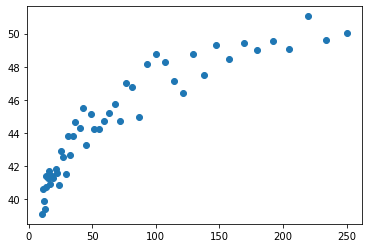

In [118]:
plt.scatter(x,y)

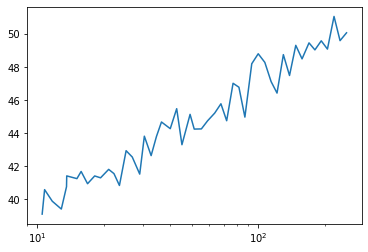

In [119]:
plt.semilogx(x,y)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x118353c10>,
      dtype=object)

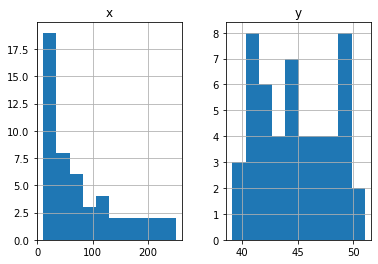

In [120]:
data_df.hist()

As we can see the histogram is skewed to the right and it is an indication that a log transformation could be useful in this case.

I will use the log transformation (feature engineering) for the input variable x. Then I will use a polynomial of degree = 1 (linear) in order to fit the transformed x. I check that there is no x == 0.

In [121]:
coefs, res, rank, singular_values, rcond = np.polyfit(np.log(x), y, deg = 1, full = True)
y_pred = np.polyval(coefs, np.log(x))

In [122]:
x_values = np.linspace(x.min(), x.max(), num = 100)
y_values = np.polyval(coefs, np.log(x_values))

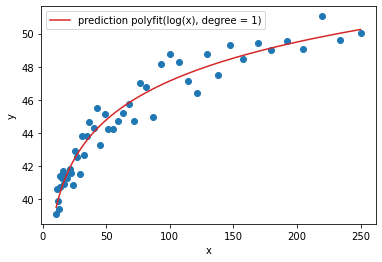

In [123]:
plt.scatter(x,y)
plt.plot(x_values, y_values, c = 'C3', label = 'prediction polyfit(log(x), degree = 1)')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()


the function polyfit is using the RSS as a cost function.

In [124]:
coefs

array([ 3.390241  , 31.52920122])

In [125]:
r2 = r2_score(y, y_pred)
r2

0.9411567093138288

or else:

In [126]:
res

array([31.84265175])

In [127]:
rank

2

In [128]:
rcond

1.1102230246251565e-14

__Interpretation:__
Variance is the quantification of noise in the data, i.e. the random fluctuation around the mean. The interpretation of the R2 score is that the model can predict the 94% of the variance present in the data, which is a very good result.

R2 = 1- RSSmodel/RSSbaseline

In this case R2 ≈ 1 which means that the our model perfroms better than the beseline.

In [129]:
def RSS(y, ypred):
    return np.sum(np.square(y-ypred))

In [130]:
RSS(y,y_pred)

31.842651752756687

# Task 2
The second task consists of fitting a model to a set of data points that contains outliers. 

The goal is to try and compare different approaches to handle outliers. Use the train/test split methodology (ex. 80-20 splits) and compare the test MAE score for each one of the following approaches

 - Fit a linear regression with the outliers
 - Fit a huber regression with the outliers
 - Fit a linear regression without the outliers
 
The linear regression without outliers and huber regression models should both perform better than the linear regression with outliers.

In [131]:
data2_df = pd.read_csv(os.path.join('warm-up', 'task-2.csv'))

In [132]:
data2_df.head()

,x1,x2,x3,y
0,7.892,318.818,162.970,2112.420
1,8.830,303.180,181.399,2096.231
2,13.811,296.231,145.849,2067.045
3,12.863,325.830,167.996,2269.262
4,13.698,254.035,171.892,1966.604


In [133]:
data2_df.shape

(1000, 4)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1196ffee0>,
      dtype=object)

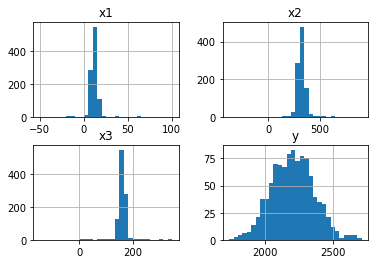

In [194]:
data2_df.hist(bins = 30)

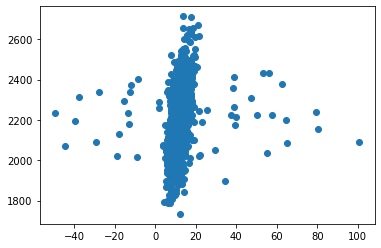

In [141]:
plt.scatter(data2_df.x1,data2_df.y)

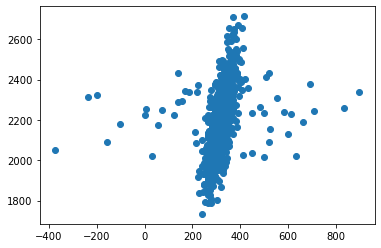

In [142]:
plt.scatter(data2_df.x2,data2_df.y)

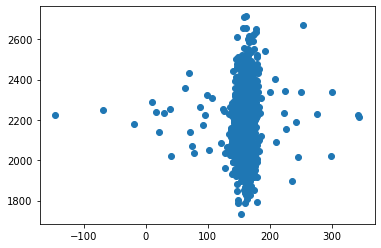

In [143]:
plt.scatter(data2_df.x3,data2_df.y)

(array([  2.,   0.,   0.,   0.,   0.,   0.,   1.,   2.,   3.,   5.,  14.,
         23.,  41.,  59., 102., 108., 166., 187., 149.,  66.,  29.,   6.,
          1.,   1.,   1.,   1.,   6.,   0.,   2.,   3.,   2.,   2.,   1.,
          1.,   1.]),
 array([0.54696467, 0.66311043, 0.7792562 , 0.89540196, 1.01154772,
        1.12769348, 1.24383924, 1.35998501, 1.47613077, 1.59227653,
        1.70842229, 1.82456806, 1.94071382, 2.05685958, 2.17300534,
        2.28915111, 2.40529687, 2.52144263, 2.63758839, 2.75373416,
        2.86987992, 2.98602568, 3.10217144, 3.2183172 , 3.33446297,
        3.45060873, 3.56675449, 3.68290025, 3.79904602, 3.91519178,
        4.03133754, 4.1474833 , 4.26362907, 4.37977483, 4.49592059,
        4.61206635]),
 <a list of 35 Patch objects>)

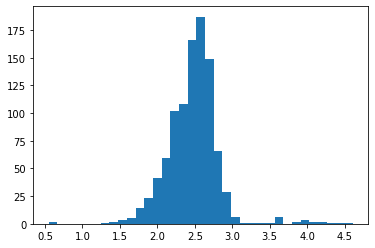

In [154]:
plt.hist(np.log(data2_df.x1), bins = 35)

(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   1.,   1.,   1.,   0.,   3.,   3.,  31., 833.,
        104.,  11.,   5.]),
 array([-0.87707002, -0.56993407, -0.26279813,  0.04433782,  0.35147377,
         0.65860971,  0.96574566,  1.27288161,  1.58001755,  1.8871535 ,
         2.19428944,  2.50142539,  2.80856134,  3.11569728,  3.42283323,
         3.72996918,  4.03710512,  4.34424107,  4.65137702,  4.95851296,
         5.26564891,  5.57278485,  5.8799208 ,  6.18705675,  6.49419269,
         6.80132864]),
 <a list of 25 Patch objects>)

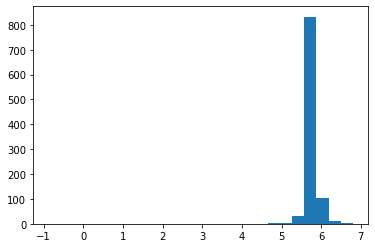

In [151]:
plt.hist(np.log(data2_df.x2), bins = 25)

(array([  1.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   1.,   0.,
          0.,   1.,   0.,   0.,   1.,   1.,   0.,   0.,   0.,   0.,   1.,
          2.,   2.,   1.,   2.,   2.,   1.,   3.,  23., 221., 506., 205.,
          6.,   3.,   4.,   4.,   1.,   2.,   2.]),
 array([2.22343365, 2.31392171, 2.40440976, 2.49489782, 2.58538587,
        2.67587393, 2.76636198, 2.85685004, 2.94733809, 3.03782615,
        3.1283142 , 3.21880226, 3.30929031, 3.39977836, 3.49026642,
        3.58075447, 3.67124253, 3.76173058, 3.85221864, 3.94270669,
        4.03319475, 4.1236828 , 4.21417086, 4.30465891, 4.39514696,
        4.48563502, 4.57612307, 4.66661113, 4.75709918, 4.84758724,
        4.93807529, 5.02856335, 5.1190514 , 5.20953946, 5.30002751,
        5.39051557, 5.48100362, 5.57149167, 5.66197973, 5.75246778,
        5.84295584]),
 <a list of 40 Patch objects>)

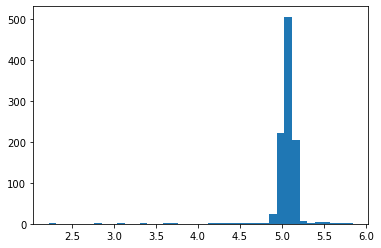

In [155]:
plt.hist(np.log(data2_df.x3), bins = 40)

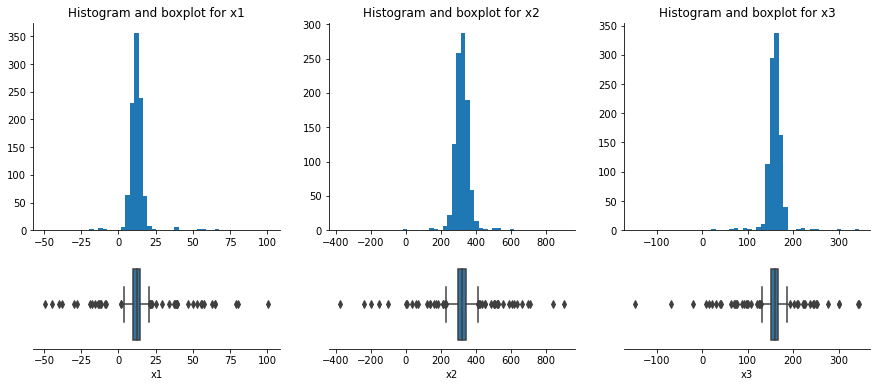

In [354]:
fig, axes = plt.subplots(2, 3, gridspec_kw = {"height_ratios": (0.7, 0.3)}, figsize = (15,6))

# pairing feature with column in plot
for (feature, plot_col) in zip(['x1', 'x2', 'x3'], [0, 1, 2]):
    axes[0, plot_col].hist(data2_df[feature], bins = 50)
    axes[0, plot_col].set_title("Histogram and boxplot for {}".format(feature))
    sns.despine(ax = axes[0, plot_col])
    sns.boxplot(data2_df[feature], ax = axes[1, plot_col], fliersize = 5)
    axes[1, plot_col].set(yticks = [])
    sns.despine(ax = axes[1, plot_col], left = True)
    
    

/Users/tgdstpej/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/tgdstpej/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/tgdstpej/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/Users/tgdstpej/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/tgdstpej/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/tgdstpej/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:840: RuntimeWarn

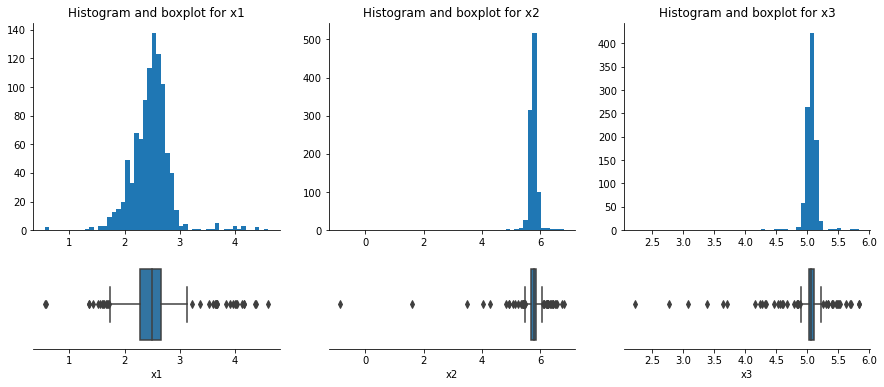

In [355]:
fig, axes = plt.subplots(2, 3, gridspec_kw = {"height_ratios": (0.7, 0.3)}, figsize = (15,6))

# pairing feature with column in plot
for (feature, plot_col) in zip(['x1', 'x2', 'x3'], [0, 1, 2]):
    axes[0, plot_col].hist(np.log(data2_df[feature]), bins = 50)
    axes[0, plot_col].set_title("Histogram and boxplot for {}".format(feature))
    sns.despine(ax = axes[0, plot_col])
    sns.boxplot(np.log(data2_df[feature]), ax = axes[1, plot_col], fliersize = 5)
    axes[1, plot_col].set(yticks = [])
    sns.despine(ax = axes[1, plot_col], left = True)

### Split train and test data:
split the data set 80-20%

more confident with panda

In [186]:
train_df, test_df = train_test_split(data2_df, train_size = 0.8, test_size = 0.2, random_state = 0)

In [187]:
X_tr = train_df.drop(['y'], axis = 1).values
y_tr = train_df['y'].values
X_te = test_df.drop(['y'], axis = 1).values
y_te = test_df['y'].values

In [188]:
def MAE(y, y_pred):
    return np.mean(np.abs(y-y_pred))

### Baseline

In [297]:
print(MAE(y_te, np.mean(y_tr)))

117.26195640000003


### fit Linear Regression

In [189]:
lr = LinearRegression()
lr.fit(X_tr, y_tr)

print('Coefficients:', lr.coef_)
print('Intercept:', lr.intercept_)
print('R2 score:', lr.score(X_te, y_te))

y_pred_lr = lr.predict(X_te)

print(MAE(y_te, lr.predict(X_te)))

Coefficients: [ 3.18946219  0.72611244 -0.29586984]
Intercept: 1982.1964160299176
R2 score: 0.17957703204094855
104.78843301492125


### fit Huber Regressor

In [190]:
huber = HuberRegressor()
huber.fit(X_tr, y_tr)

print('Coefficients:', huber.coef_)
print('Intercept:', huber.intercept_)
print('R2 score:', huber.score(X_te, y_te))

y_pred_huber = huber.predict(X_te)
print(MAE(y_te, huber.predict(X_te)))

Coefficients: [11.70103578  2.21157025 -0.35049229]
Intercept: 1413.3619810993166
R2 score: 0.01898605837627443
83.90812366882037


### removing outliers

I have observed that none of the features exhibit a normal distribution also after a log transformation. Therefore I will choose some a more statistically robust method to cutoff outliers in this case the median abslute deviation MAD with a constant of C = 2√3 ≈ 1.1547

### Method - 1: Median Absolute Deviation (MAD)

In [191]:
C = 2/np.sqrt(3)
C

1.1547005383792517

In [192]:
X_tr[1]

array([ 19.161, 339.872, 156.181])

In [223]:
def MAD(X, C):
    return C*np.median(np.abs(X - np.median(X, axis = 0)), axis = 0)

In [232]:
m = np.median(X, axis = 0)
m

array([ 12.22  , 321.456 , 159.3275])

In [233]:
X<m

array([[ True,  True,  True],
       [False, False,  True],
       [ True, False,  True],
       ...,
       [ True, False,  True],
       [ True,  True, False],
       [ True, False, False]])

In [ ]:
def doubleMAD(X, C):
    C = 2/np.sqrt(3)
    m = np.median(X, axis = 0)
    dev = np.abs(X-np.median(X, axis = 0))
    X_left = X[X<m]
    X_right = X[X>m]
    left_mad = C*np.median(np.abs(X_left - np.median(X_left, axis = 0)), axis = 0)
    right_mad = C*np.median(np.abs(X_right - np.median(X_right, axis = 0)), axis = 0)
    

In [235]:
X_left = X[X<m]
left_mad = C*np.median(np.abs(X_left - np.median(X_left, axis = 0)), axis = 0)
left_mad

161.39595835088315

In [224]:
# filter_mad = (X-np.median(X, axis = 0))/MAD(X,C) >

In [225]:
MAD(X_tr, C)

array([ 2.52359803, 26.45130258,  8.54593868])

In [ ]:
X = X_tr

## Question:
    I would like to discuss the double MAD implementation with you.

not sure how to finish

### Method - 2: Inter-quantile Range (IQR)

Since the distributions are not gaussian I will not apply the z-scores but the Interquantile range to filter the outliers.

In [ ]:
# for one feature:
## compute the interquartile range
#Q1 = np.percentile(y, 25, axis=0)
#Q3 = np.percentile(y, 75, axis=0)
#IQR = Q3 - Q1 # interquatile range

# select outliers
#lower_bound = Q1 - 1.5 * IQR 
#upper_bound = Q3 + 1.5 * IQR
#idx = (y < lower_bound) | (y > upper_bound)

#coefs_iqr = np.polyfit(x[~idx], y[~idx], deg=1)

In [256]:
# compute the interquantile range IQR:
Q3 = np.quantile(train_df, 0.75, axis = 0)
# or equivalently: Q3_ = np.percentile(X, 75, axis = 0)
Q1 = np.quantile(train_df, 0.25, axis = 0)

IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

print("Feature 1: lower bound: {:.4f}, upper bound: {:.4f}".format(lower_bound[0], upper_bound[0]))
print("Feature 2: lower bound: {:.4f}, upper bound: {:.4f}".format(lower_bound[1], upper_bound[1]))
print("Feature 3: lower bound: {:.4f}, upper bound: {:.4f}".format(lower_bound[2], upper_bound[2]))

Feature 1: lower bound: 3.1282, upper bound: 20.9983
Feature 2: lower bound: 227.7466, upper bound: 411.0816
Feature 3: lower bound: 130.1126, upper bound: 188.1096


In [257]:
Q3

array([  14.297  ,  342.331  ,  166.36075, 2315.46625])

In [275]:
#select outliers:
idx = ((train_df < lower_bound) | (train_df > upper_bound))
print("total number of outliers per feature: ")
print(idx.sum(axis = 0))

idx.sum(axis = 0)


total number of outliers per feature: 
x1    41
x2    41
x3    37
y      4
dtype: int64


x1    41
x2    41
x3    37
y      4
dtype: int64

In [276]:
idx

,x1,x2,x3,y
687,False,False,True,False
500,False,False,False,False
332,False,False,False,False
979,False,False,False,False
817,False,True,False,False
...,...,...,...,...
835,False,True,True,False
192,False,False,False,False
629,False,False,False,False
559,False,False,False,False


In [277]:
idx.sum(axis=0).sum()

123

In [278]:
idx_any = idx.any(axis = 1)

In [283]:
idx.any(axis = 0)

x1    True
x2    True
x3    True
y     True
dtype: bool

In [284]:
idx.any(axis = 1)

687     True
500    False
332    False
979    False
817     True
       ...  
835     True
192    False
629    False
559    False
684    False
Length: 800, dtype: bool

In [280]:
idx_any.sum()

55

In [279]:
outliers = train_df.loc[idx_any, :]
outliers.shape

(55, 4)

In [281]:
outliers.head()

,x1,x2,x3,y
687,10.298,276.916,127.701,1962.885
817,11.599,222.001,179.855,1916.097
37,-29.581,522.695,139.120,2088.578
294,49.970,265.393,96.210,2221.979
484,21.807,412.074,135.486,2025.808


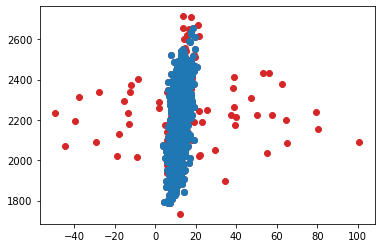

In [302]:
plt.scatter(data2_df.x1,data2_df.y, c= 'C3')
plt.scatter(train_df_wo.x1, train_df_wo.y)

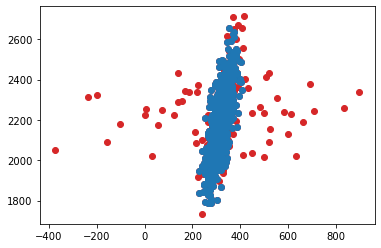

In [350]:
plt.scatter(data2_df.x2,data2_df.y, c= 'C3')
plt.scatter(train_df_wo.x2, train_df_wo.y)

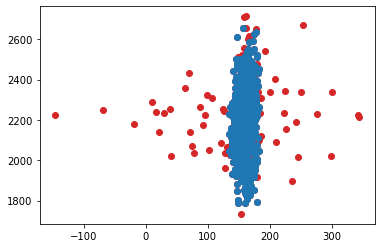

In [351]:
plt.scatter(data2_df.x3,data2_df.y, c= 'C3')
plt.scatter(train_df_wo.x3, train_df_wo.y)

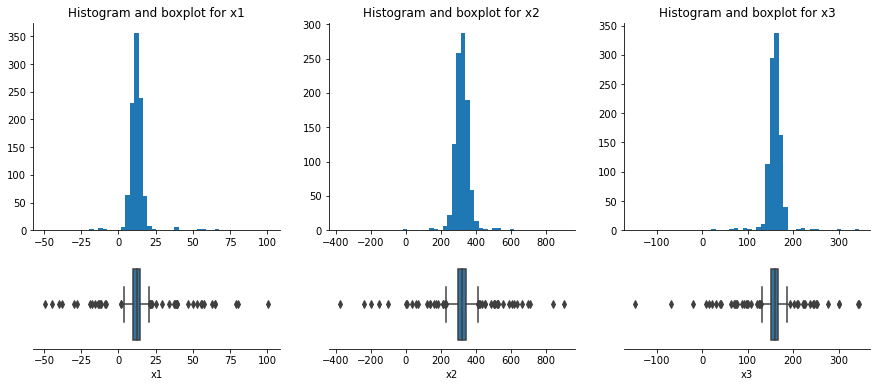

In [353]:
fig, axes = plt.subplots(2, 3, gridspec_kw = {"height_ratios": (0.7, 0.3)}, figsize = (15,6))

# pairing feature with column in plot
for (feature, plot_col) in zip(['x1', 'x2', 'x3'], [0, 1, 2]):
    axes[0, plot_col].hist(data2_df[feature], bins = 50)
    axes[0, plot_col].set_title("Histogram and boxplot for {}".format(feature))
    sns.despine(ax = axes[0, plot_col])
    sns.boxplot(data2_df[feature], ax = axes[1, plot_col], fliersize = 5)
    axes[1, plot_col].set(yticks = [])
    sns.despine(ax = axes[1, plot_col], left = True)
    
    

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

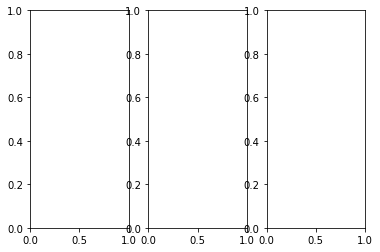

In [348]:
fig, axes = plt.subplots(nrows = 1, ncols = 3)
y = data2_df.y
for (feature, plot_col) in zip(['x1', 'x2', 'x3'], [0, 1, 2]):
    axes[feature, plot_col].scatter(data2_df[feature], y)
    data2_df[feature].plot(data2_df.y)


In [321]:
#drop from the index
train_df_wo = train_df.drop(outliers.index, axis = 0)

In [289]:
train_df.drop(outliers.index, axis = 0)

,x1,x2,x3,y
500,19.161,339.872,156.181,2442.675
332,11.356,363.086,158.807,2417.074
979,10.656,326.522,164.297,2220.691
620,12.771,339.784,167.813,2460.546
814,12.819,321.714,171.525,2106.374
...,...,...,...,...
763,8.992,313.602,142.397,2106.199
192,13.682,343.887,170.622,2427.794
629,9.708,365.431,152.853,2240.502
559,9.800,313.009,161.467,2061.980


In [288]:
train_df_wo.head()

,x1,x2,x3,y
500,19.161,339.872,156.181,2442.675
332,11.356,363.086,158.807,2417.074
979,10.656,326.522,164.297,2220.691
620,12.771,339.784,167.813,2460.546
814,12.819,321.714,171.525,2106.374


In [ ]:
plt.scatter()

In [292]:
X_tr_wo = train_df_wo.drop(['y'], axis = 1).values
y_tr_wo = train_df_wo['y'].values

In [296]:
lr_wo = LinearRegression()
lr_wo.fit(X_tr_wo, y_tr_wo)

print('Coefficients:', lr_wo.coef_)
print('Intercept:', lr_wo.intercept_)
print('R2 score:', lr_wo.score(X_te, y_te))

y_pred_wo = lr_wo.predict(X_te)
print(MAE(y_te, lr_wo.predict(X_te)))

Coefficients: [29.49479143  3.85471742  2.55972655]
Intercept: 210.10519090123762
R2 score: -1.2126778463965078
70.66679261038584


In [362]:
mae_baseline = MAE(y_te, np.mean(y_tr))
mae_lr = MAE(y_te, lr.predict(X_te))
mae_huber = MAE(y_te, huber.predict(X_te))
mae_wo_outliers = MAE(y_te, lr_wo.predict(X_te))

mae_values = [mae_baseline, mae_lr, mae_huber, mae_wo_outliers]

In [363]:
titles = ['baseline', 'lr', 'huber', 'lr_no_outliers']

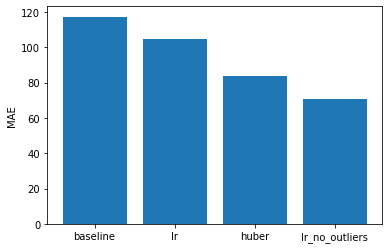

In [369]:
xcor = np.arange(len(mae_values))
plt.bar(xcor, mae_values)
plt.xticks(xcor, titles)
plt.ylabel('MAE')
plt.show()